In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import infoshare.utils as utils

In [3]:
# # plotting config
# sns.set_style("white")
# # in inches
TEXTWIDTH = 6.30045
COLWIDTH = 3.03209
# # colormap to use
cmap = sns.diverging_palette(20, 145, as_cmap=True)
# # dictionary of label font config
# label_dict = {"weight": "bold"}

In [4]:
treebank2eval_path = {
    "en_gum": {
        "pos": "../lightning_logs/xlm-roberta-base/en_gum/POS/agg=max_probe=9/evaluation",
        "dep": "../lightning_logs/xlm-roberta-base/en_gum/DEP/agg=first_probe=9_concat-mode=ONLY/evaluation",
    },
    "it_vit": {
        "pos": "../lightning_logs/xlm-roberta-base/it_vit/POS/agg=first_probe=9/evaluation",
        "dep": "../lightning_logs/xlm-roberta-base/it_vit/DEP/agg=mean_probe=9_concat-mode=ONLY/evaluation",
    },
    "el_gdt": {
        "pos": "../lightning_logs/xlm-roberta-base/el_gdt/POS/agg=mean_probe=12/evaluation",
        "dep": "../lightning_logs/xlm-roberta-base/el_gdt/DEP/agg=mean_probe=9_concat-mode=ONLY/evaluation",
    },
}

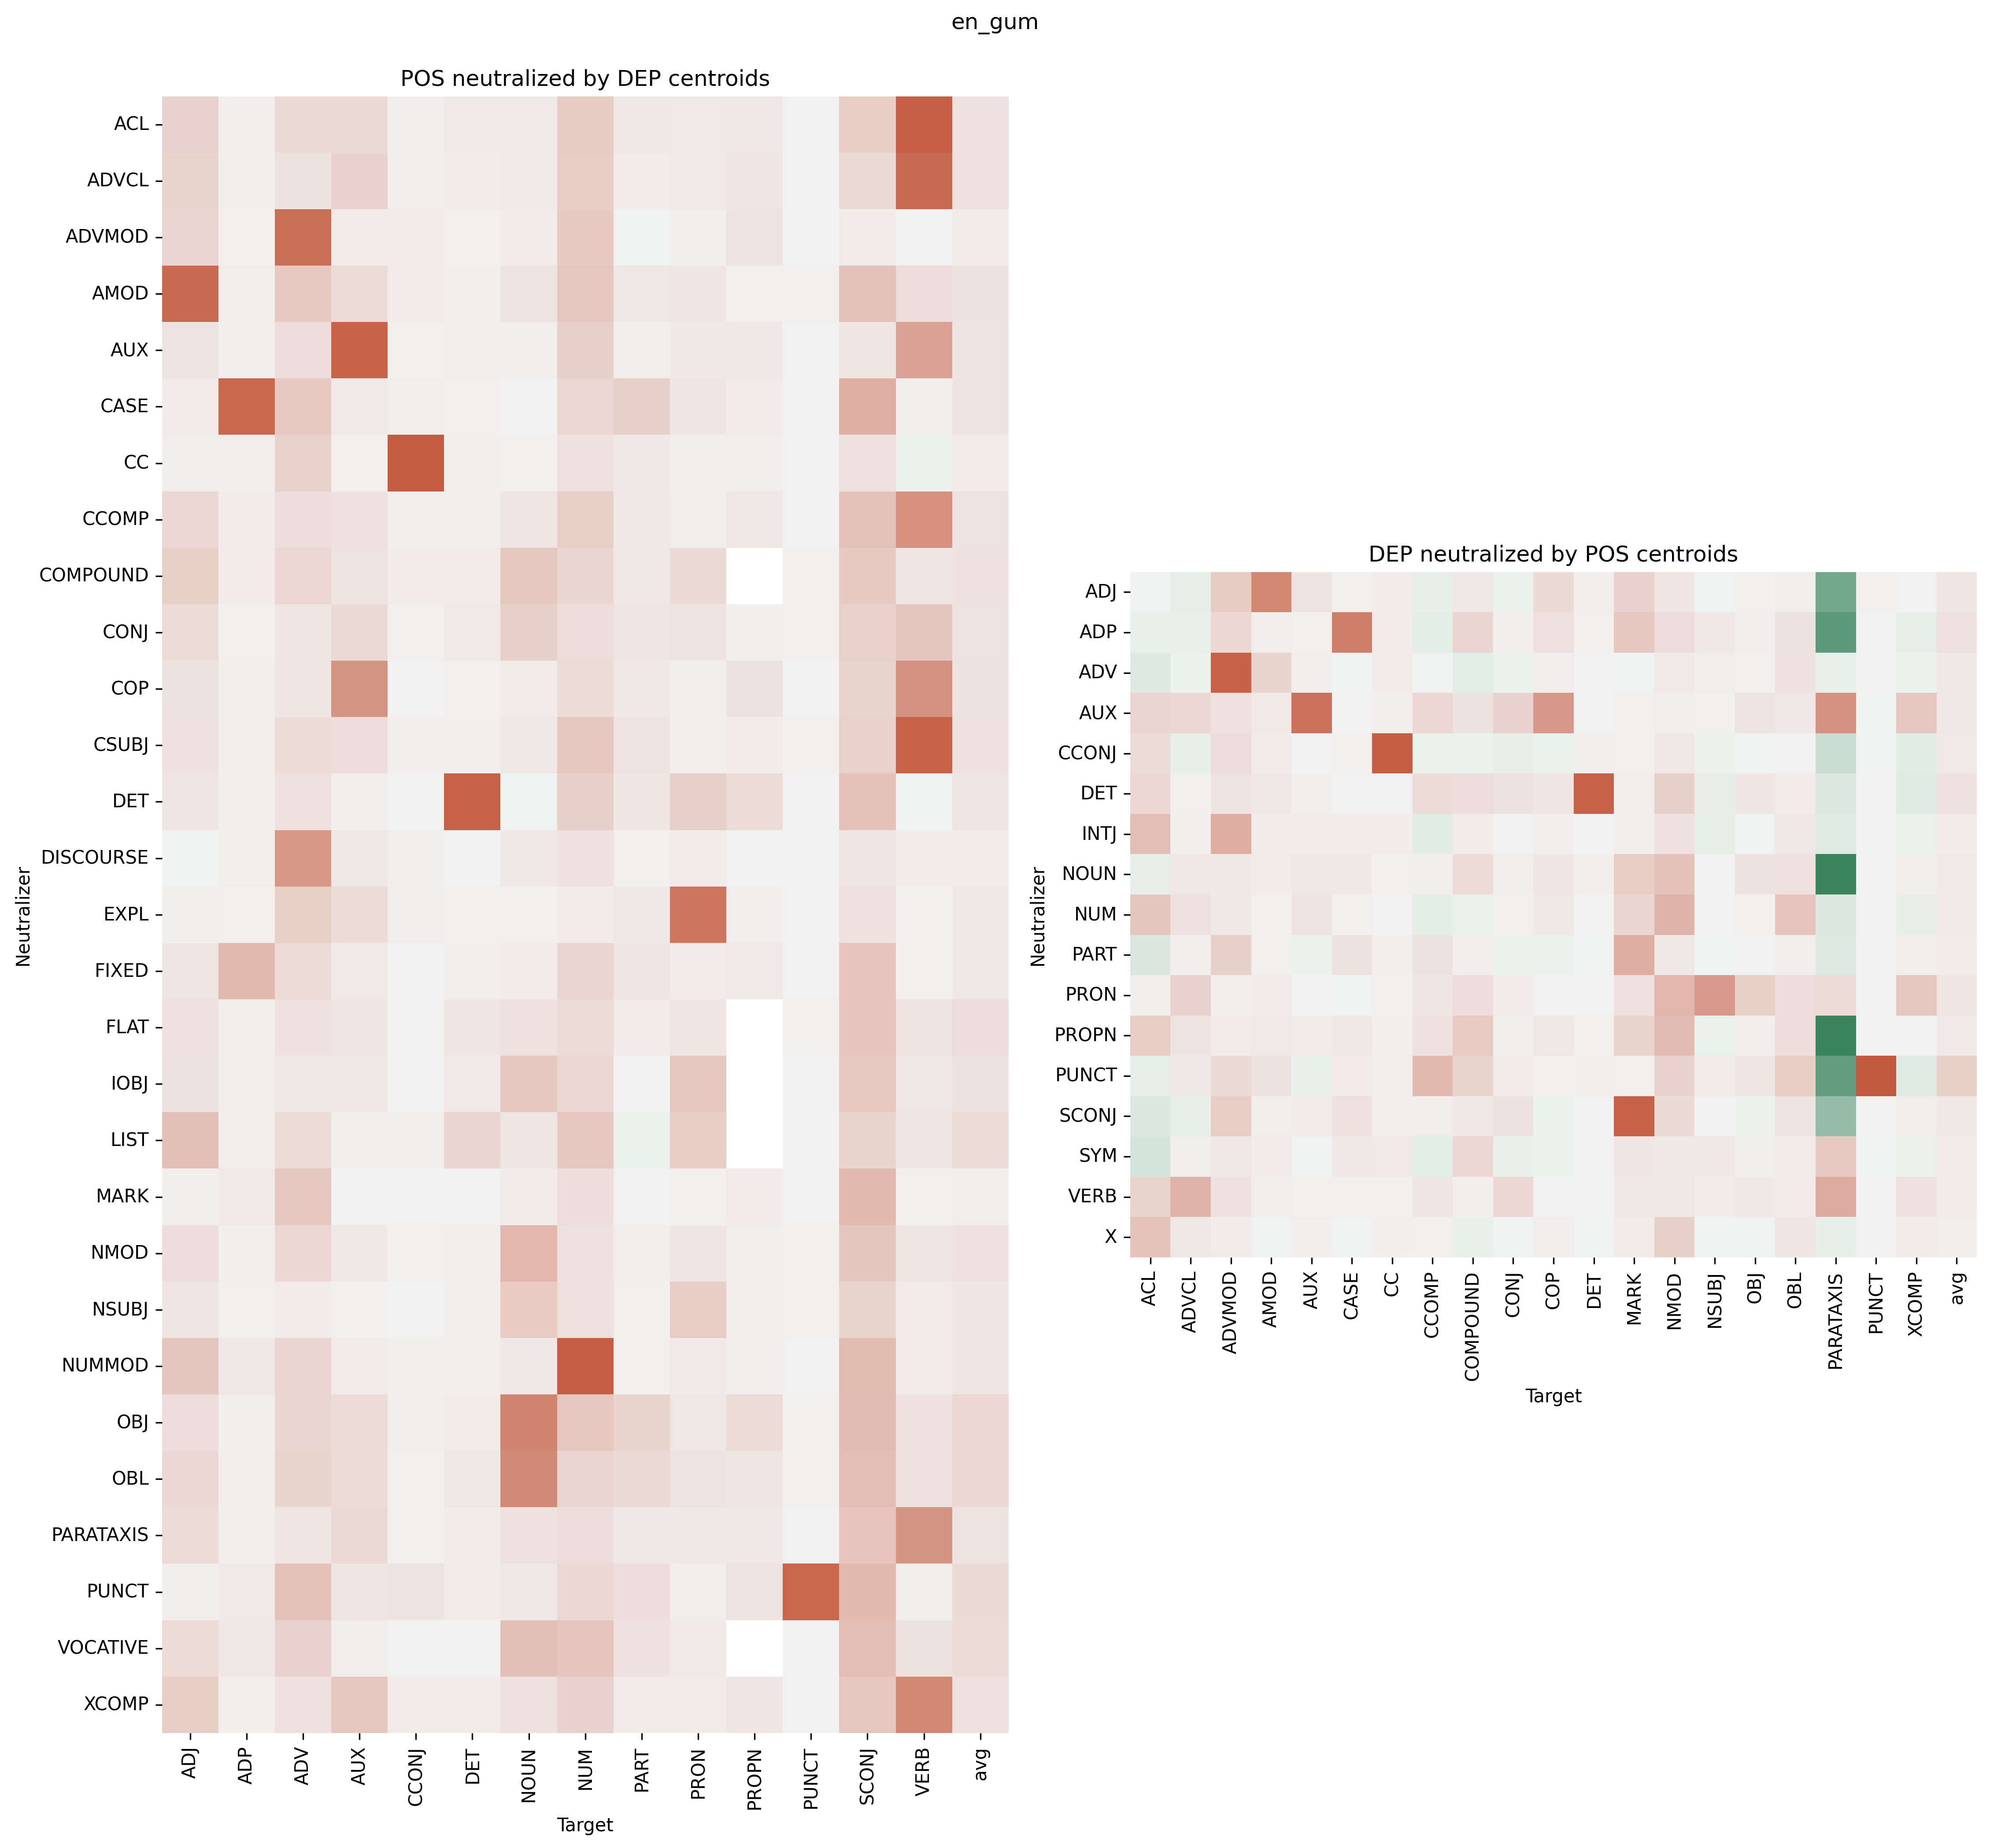

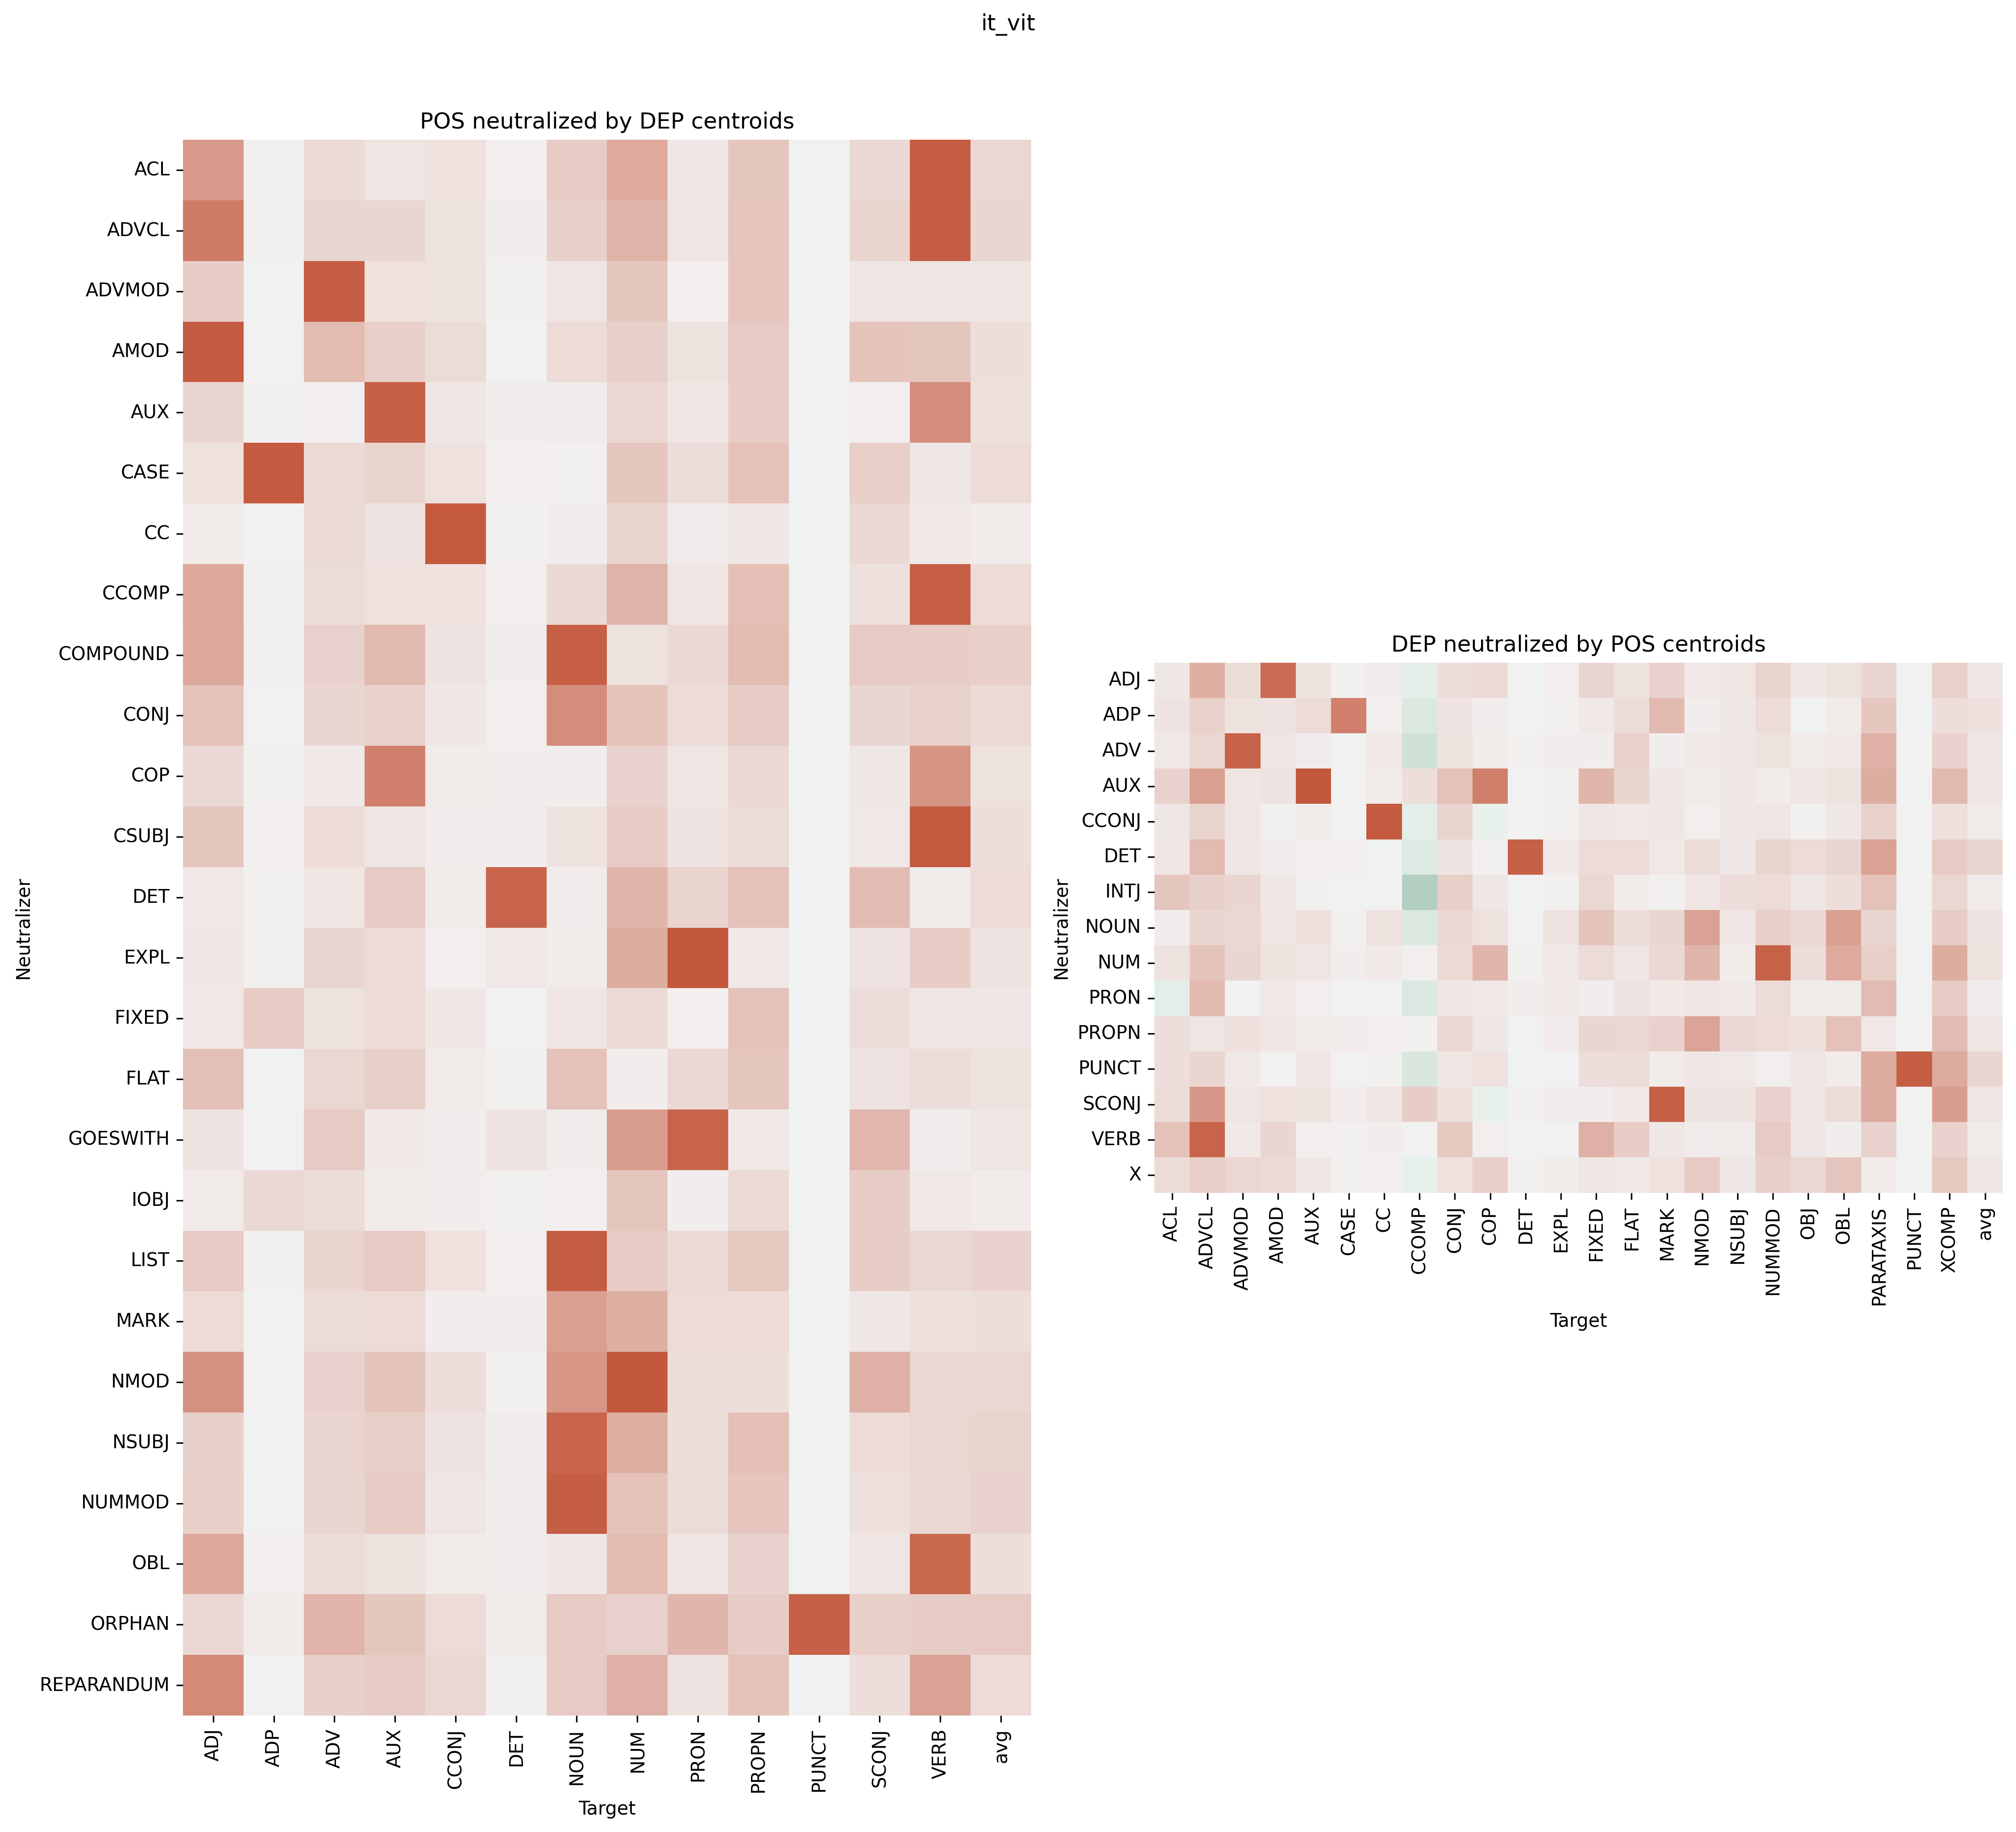

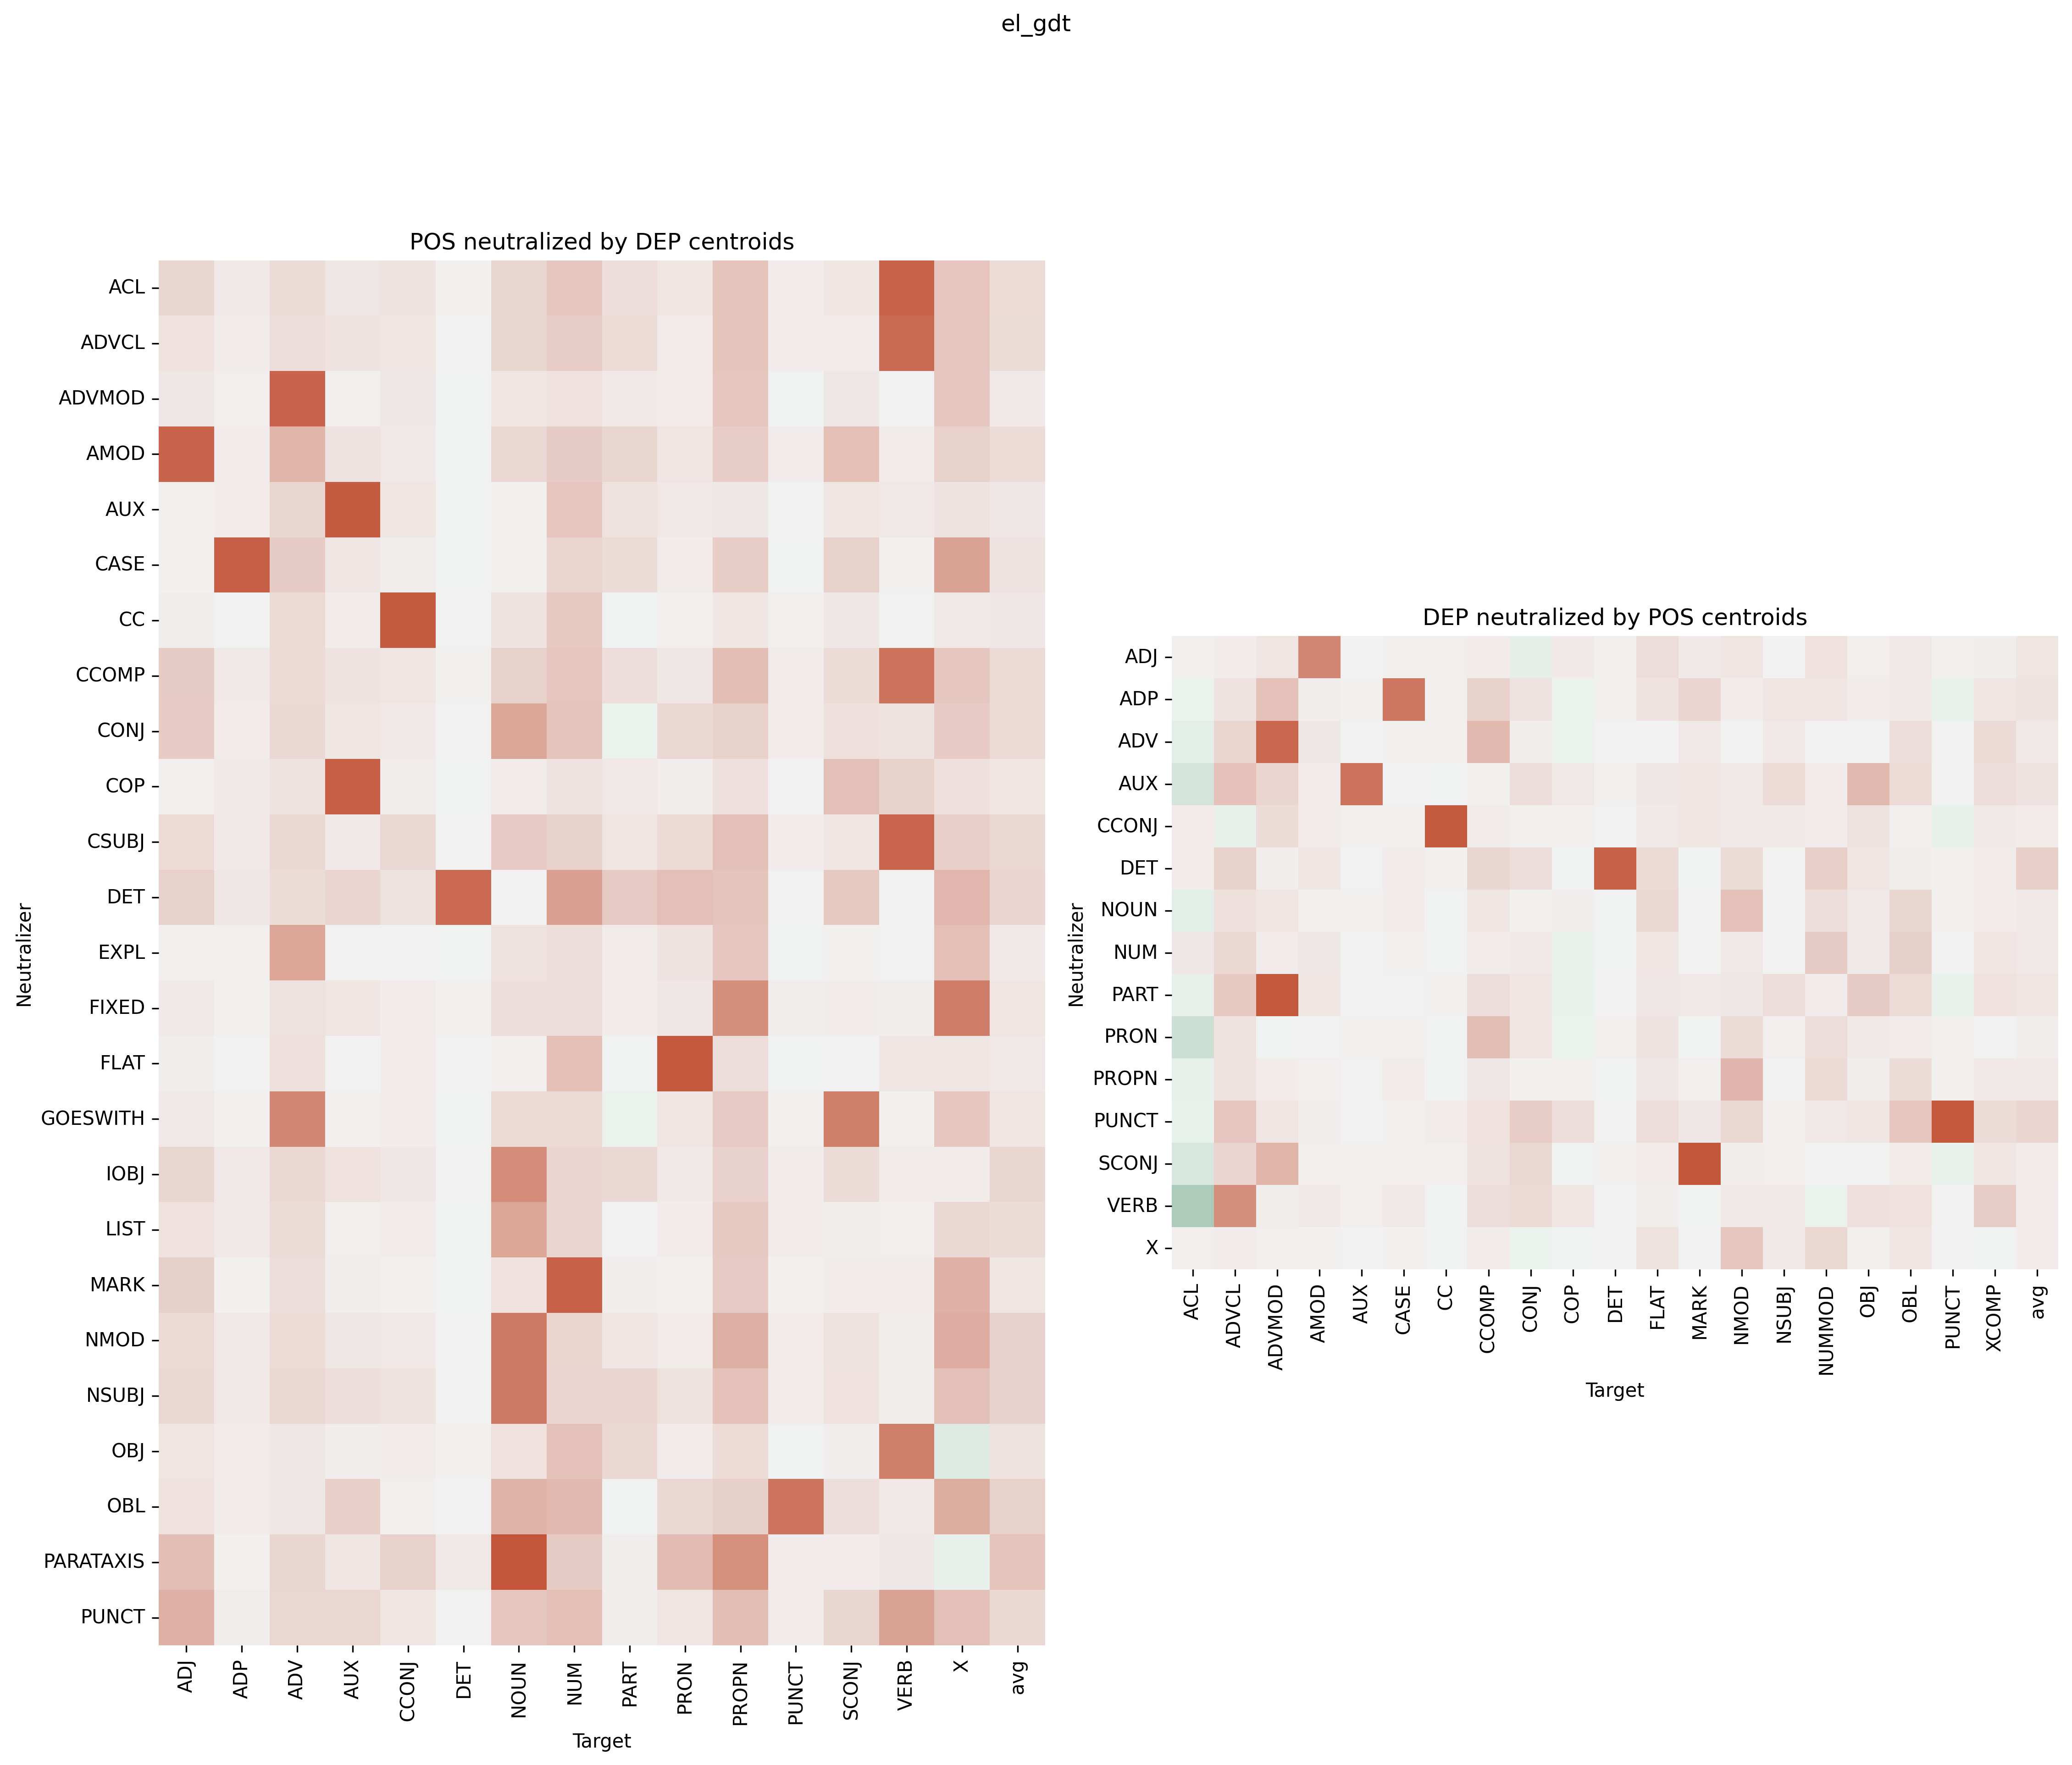

In [5]:
# sns.set_context("paper", font_scale=0.8)
for treebank in ["en_gum", "it_vit", "el_gdt"]:
    # getting the data
    pos_eval_path = treebank2eval_path[treebank]["pos"]
    pos_acc_drop = utils.get_acc_drop(pos_eval_path, None, suffix_filter=r"^([a-z]+)$")

    dep_eval_path = treebank2eval_path[treebank]["dep"]
    dep_acc_drop = utils.get_acc_drop(dep_eval_path, None, suffix_filter=r"^([A-Z]+)$")

    # plotting
    f, (ax1, ax2) = plt.subplots(
        1, 2, figsize=(COLWIDTH * 5, COLWIDTH * 2 * 5), dpi=300
    )
    ax1 = sns.heatmap(
        pos_acc_drop * 100,
        annot=False,
        # annot_kws={"fontsize": 7},
        fmt=".0f",
        cmap=cmap,
        cbar=False,
        ax=ax1,
        vmin=-100,
        vmax=100,
        center=0,
        square=True,
    )
    ax1.set_title("POS neutralized by DEP centroids")
    ax2 = sns.heatmap(
        dep_acc_drop * 100,
        annot=False,
        # annot_kws={"fontsize": 7},
        fmt=".0f",
        cmap=cmap,
        cbar=False,
        ax=ax2,
        vmin=-100,
        vmax=100,
        center=0,
        square=True,
    )
    ax2.set_title("DEP neutralized by POS centroids")
    # plt.savefig(
    #     "images/cross_task.png",
    #     bbox_inches="tight",
    # )
    f.suptitle(treebank, y=0.72)
    f.set_tight_layout(True)
    plt.show()